In [1]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from pandas.plotting import scatter_matrix
import datetime
from matplotlib.pyplot import figure



In [2]:
meteorites_wtd = pd.read_csv("data/results/meteorites_weighted.csv")

meteorites_wtd.drop(meteorites_wtd.columns[meteorites_wtd.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

meteorites_wtd.head()

,id,recclass,mass,fell_found,year,latitude,longitude,group,chondrite,type,lvl3,lvl4,lc_sample,weights
0,12351,EH3,334.0,Found,1905,-13.01667,34.20000,EH,Chondrite,Stony,Enstatite,EH-EL,0,1.000000
1,14645,"Iron, IIIAB",200000.0,Found,1959,40.50000,112.50000,Iron IIIAB,Achondrite,Iron,Magmatic,Siderite,2,0.064345
2,12465,L4,7000.0,Fell,1925,47.75000,16.23333,L,Chondrite,Stony,Ordinary,L,2,0.064345
3,30357,"Iron, IIAB",9600.0,Found,1903,-35.98333,145.58333,Iron IIAB,Achondrite,Iron,Magmatic,Siderite,2,0.064345
4,24325,L6,25000.0,Fell,1795,54.13667,-0.41333,L,Chondrite,Stony,Ordinary,L,0,1.000000


In [3]:
meteorites_wtd["fell_found"] = meteorites_wtd["fell_found"].astype("category")
meteorites_wtd["group"] = meteorites_wtd["group"].astype("category")
meteorites_wtd["chondrite"] = meteorites_wtd["chondrite"].astype("category")
meteorites_wtd["type"] = meteorites_wtd["type"].astype("category")
meteorites_wtd["lvl3"] = meteorites_wtd["lvl3"].astype("category")
meteorites_wtd["lvl4"] = meteorites_wtd["lvl4"].astype("category")
meteorites_wtd["lc_sample"] = meteorites_wtd["lc_sample"].astype("category")
meteorites_wtd["weights"] = meteorites_wtd["weights"].astype("category")
meteorites_wtd["year"] = meteorites_wtd["year"].astype("category")

meteorites_wtd["fell_found"].value_counts().index

CategoricalIndex(['Found', 'Fell'], categories=['Fell', 'Found'], ordered=False, dtype='category')

In [4]:
meteorites_wtd["group"].value_counts().index

CategoricalIndex(['H', 'L', 'Iron', 'Iron IAB', 'LL', 'Iron IIIAB',
                  'Chondrite', 'Iron IIAB', 'Stony', 'Iron IIE', 'Iron IVA',
                  'Mesosiderite', 'Main Group', 'CM', 'Ureilite', 'CV', 'EH',
                  'Acapulcoite', 'Iron IVB', 'Eagle Station Group', 'Eucrite',
                  'Howardite', 'Iron IID', 'Aubrite', 'Iron IIIE', 'Iron IC',
                  'EL', 'Iron IIC', 'Unknown', 'Iron IIIF', 'CK', 'Iron IIG',
                  'Iron IIF', 'Lunar', 'Diogenite', 'Angrite', 'CB',
                  'Winonaite', 'Ungrouped', 'CI', 'Nakhilite', 'Rumuruti',
                  'CR', 'CO', 'Kakangari', 'Achondrite', 'Shergottite',
                  'H,L, or LL', 'Brachinite'],
                 categories=['Acapulcoite', 'Achondrite', 'Angrite', 'Aubrite', 'Brachinite', 'CB', 'CI', 'CK', ...], ordered=False, dtype='category')

In [5]:
meteorites_wtd["chondrite"].value_counts().index

CategoricalIndex(['Chondrite', 'Achondrite'], categories=['Achondrite', 'Chondrite'], ordered=False, dtype='category')

In [6]:
meteorites_wtd["type"].value_counts().index

CategoricalIndex(['Stony', 'Iron', 'Stony-Iron'], categories=['Iron', 'Stony', 'Stony-Iron'], ordered=False, dtype='category')

In [7]:
meteorites_wtd["lvl3"].value_counts().index

CategoricalIndex(['Ordinary', 'Magmatic', 'Non-magmatic', 'Carbonaceous',
                  'Pallasite', 'Mesosiderite', 'Asteroidal', 'Enstatite',
                  'Primitive or asteroidal', 'Primitive', 'Moon', 'Other',
                  'Martian'],
                 categories=['Asteroidal', 'Carbonaceous', 'Enstatite', 'Magmatic', 'Martian', 'Mesosiderite', 'Moon', 'Non-magmatic', ...], ordered=False, dtype='category')

In [8]:
meteorites_wtd["lvl4"].value_counts().index

CategoricalIndex(['H', 'L', 'Siderite', 'Primative', 'LL', 'CM-CO',
                  'H-E-D Vesta', 'EH-EL', 'CV-CK', 'CR', 'SNC', 'CI',
                  'Rumuruti', 'Kakangari grouplet'],
                 categories=['CI', 'CM-CO', 'CR', 'CV-CK', 'EH-EL', 'H', 'H-E-D Vesta', 'Kakangari grouplet', ...], ordered=False, dtype='category')

In [9]:
meteorites_wtd["lc_sample"].value_counts().index

CategoricalIndex([0, 2, 1, 14, 13, 8, 16, 10, 6, 17, 18, 9, 7, 12, 15], categories=[0, 1, 2, 6, 7, 8, 9, 10, ...], ordered=False, dtype='category')

In [10]:
meteorites_wtd["weights"].value_counts().index



CategoricalIndex([                 1.0,    0.064345060252235,
                    0.0294975764627465,   0.0286088486882495,
                    0.0166285644122995,   0.0565394577591197,
                    0.0108167525185493,   0.0031047003174863,
                    0.0228321181540189,   0.0061041565564137,
                    0.0113546666978501,   0.0040577439177692,
                    0.0057124147084446, 6.43158257859685e-05,
                    0.0003157322356765],
                 categories=[6.43158257859685e-05, 0.0003157322356765, 0.0031047003174863, 0.0040577439177692, 0.0057124147084446, 0.0061041565564137, 0.0108167525185493, 0.0113546666978501, ...], ordered=False, dtype='category')

In [11]:
meteorites_wtd["year"].value_counts().index

CategoricalIndex([1979, 1986, 1962, 1960, 1989, 1919, 1981, 1969, 1976, 1944,
                  ...
                  1835, 1781, 1654, 1632, 1740, 1668, 1716, 1803, 1864, 1819],
                 categories=[1490, 1495, 1519, 1623, 1628, 1632, 1654, 1668, ...], ordered=False, dtype='category', length=202)

In [12]:
meteorites_wtd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9897.0,15934.920683,1.015898e+04,4.00000,10028.00000,15392.00000,22704.00000,5.657700e+04
mass,9897.0,87161.653791,1.474446e+06,0.10000,367.00000,2268.00000,10800.00000,6.000000e+07
latitude,9897.0,22.525047,2.936459e+01,-57.78667,11.98333,33.13500,41.76611,6.634833e+01
longitude,9897.0,3.384620,9.185949e+01,-163.16667,-97.37000,12.21667,79.75000,1.780833e+02


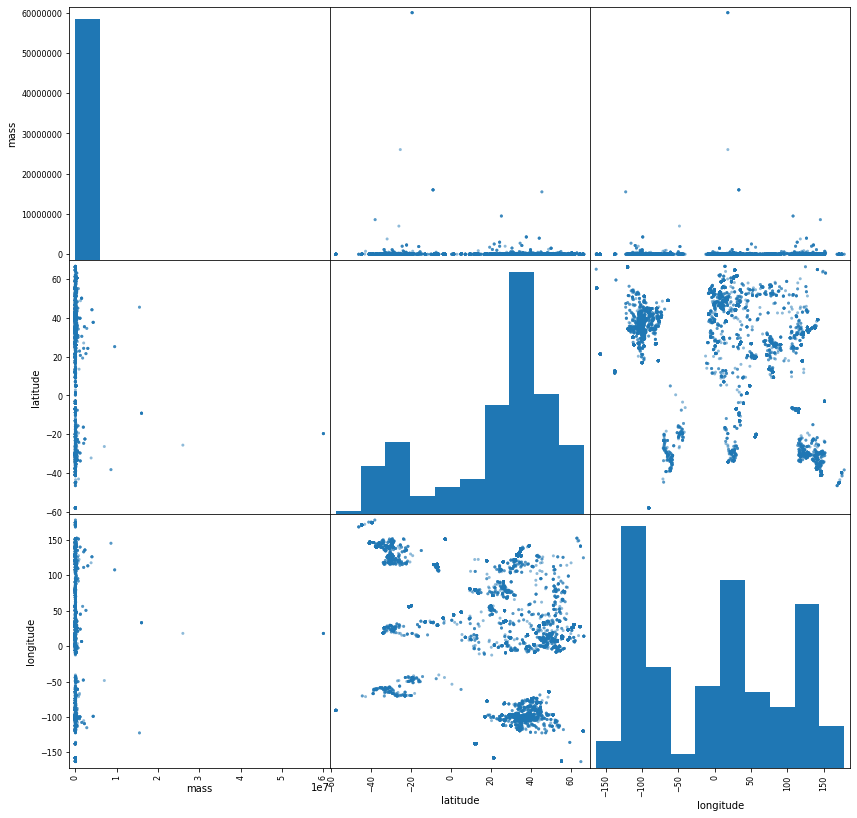

,mass,latitude,longitude
mass,1.000000,-0.042109,0.008795
latitude,-0.042109,1.000000,-0.439610
longitude,0.008795,-0.439610,1.000000


In [13]:
scatter_matrix(meteorites_wtd.iloc[:,1:14],
               figsize=(14, 14),
               diagonal='hist')
plt.show()
meteorites_wtd.iloc[:,1:14].corr()

In [14]:
#No correlations between numeric variables...  Let's look at some categories.

# fell_found
# chondrite
# type
# lc_sample

#H0 = There is no difference in mass between meteorites in these categories.

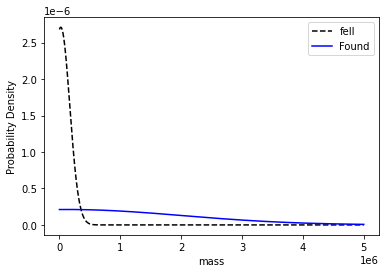

In [15]:
#Fell/found to mass

x = 2

cat_a = meteorites_wtd.mass[meteorites_wtd.fell_found == 'Fell']
cat_b = meteorites_wtd.mass[meteorites_wtd.fell_found == 'Found']

mu_a    = cat_a.mean()
mu_b    = cat_b.mean()
sigma_a = cat_a.std()
sigma_b = cat_b.std()

x = np.arange(0,5000000,1000)
y = stats.norm.pdf(x, mu_a, sigma_a)
plt.plot(x,y,'k--', label='fell')

y = stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x,y,'b-', label='Found')

plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.show()

In [16]:
# Reject the null hypothesis.  Meteorites that are found are more massive than meteorites that fall.

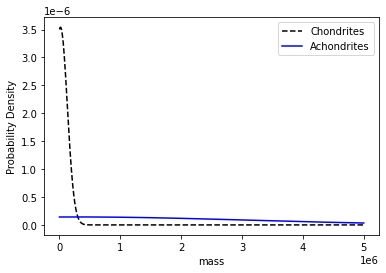

In [17]:
#chondrite to mass

x = 2

cat_a = meteorites_wtd.mass[meteorites_wtd.chondrite == 'Chondrite']
cat_b = meteorites_wtd.mass[meteorites_wtd.chondrite == 'Achondrite']

mu_a    = cat_a.mean()
mu_b    = cat_b.mean()
sigma_a = cat_a.std()
sigma_b = cat_b.std()

x = np.arange(0,5000000,1000)
y = stats.norm.pdf(x, mu_a, sigma_a)
plt.plot(x,y,'k--', label='Chondrites')

y = stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x,y,'b-', label='Achondrites')

plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.show()

In [18]:
# Reject the null hypothesis.  Meteorites that are achondrites are more massive 
# than meteorites that are chondrites.

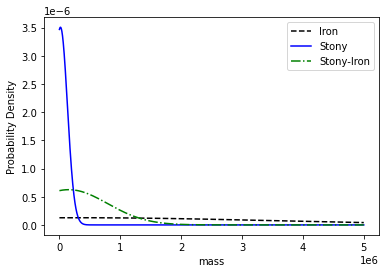

In [19]:
#Type to mass

x = 3

cat_a = meteorites_wtd.mass[meteorites_wtd.type == 'Iron']
cat_b = meteorites_wtd.mass[meteorites_wtd.type == 'Stony']
cat_c = meteorites_wtd.mass[meteorites_wtd.type == 'Stony-Iron']


mu_a    = cat_a.mean()
mu_b    = cat_b.mean()
mu_c    = cat_c.mean()

sigma_a = cat_a.std()
sigma_b = cat_b.std()
sigma_c = cat_c.std()

x = np.arange(0,5000000,1000)
y = stats.norm.pdf(x, mu_a, sigma_a)
plt.plot(x,y,'k--', label='Iron')

y = stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x,y,'b-', label='Stony')

y = stats.norm.pdf(x, mu_c, sigma_c)
plt.plot(x,y,'g-.', label='Stony-Iron')

plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.show()

In [20]:
# Reject the null hypothesis.  
# Most stony meteorites are less massive, stony-irons are in the middle, and irons are the most massive.

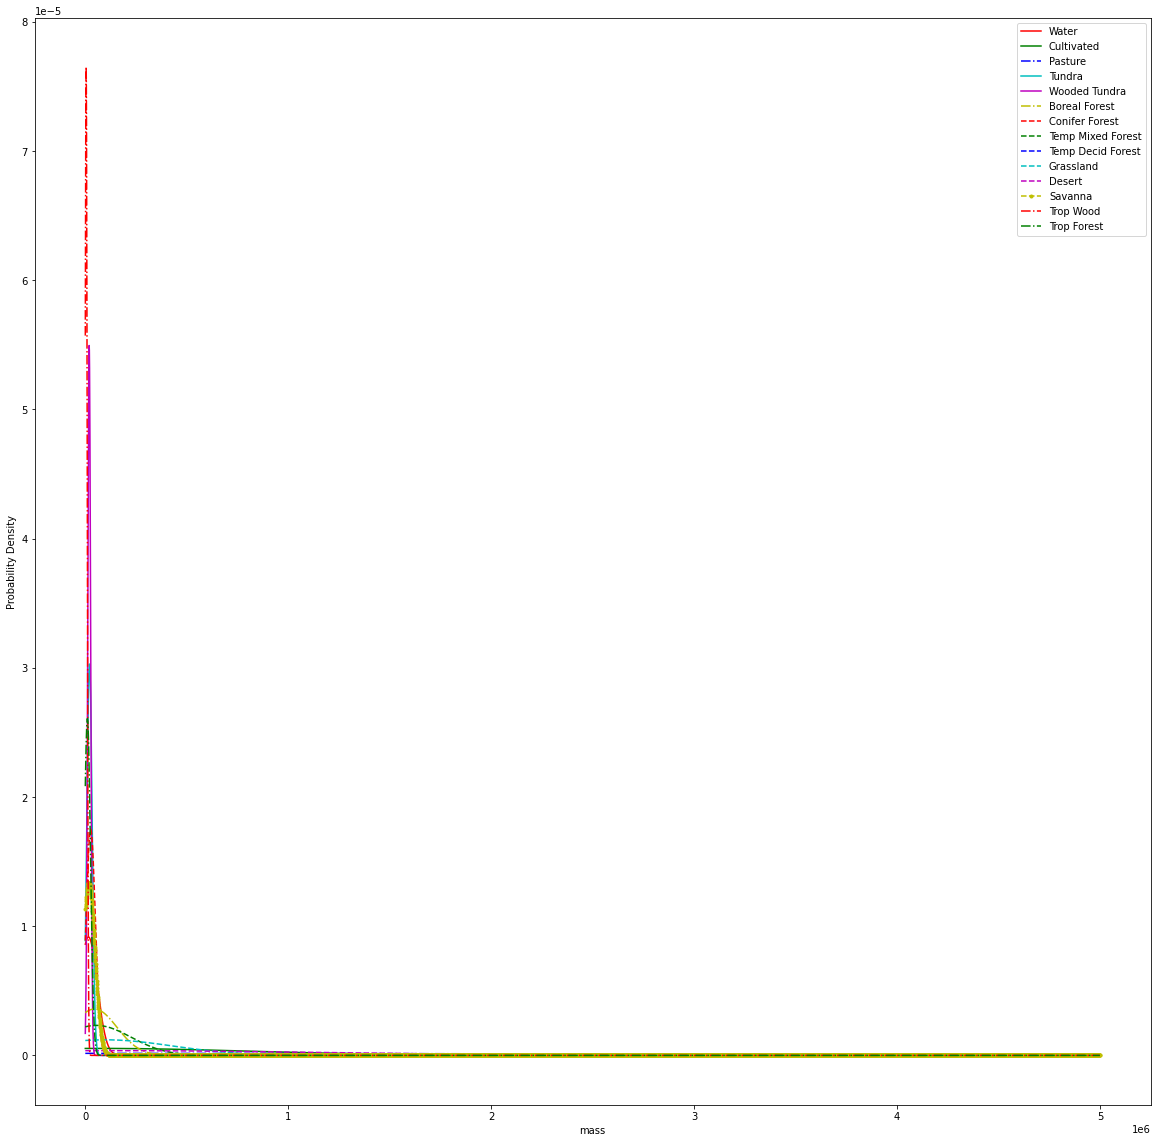

In [21]:
#lc_sample to mass

#    0  Water Bodies
#    1  Cultivated land
#    2  Pasture/land used for grazing
#    6  Tundra
#    7  Wooded tundra
#    8  Boreal forest
#    9  Cool conifer forest
#   10  Temperate mixed forest
#   11  Temperate deciduous forest
#   13  Grassland/Steppe
#   14  Hot desert
#   16  Savanna
#   17  Tropical woodland
#   18  Tropical forest

#Type to mass

figure(figsize=(20,20))

x = 14

cat_a = meteorites_wtd.mass[meteorites_wtd.lc_sample == 0]
cat_b = meteorites_wtd.mass[meteorites_wtd.lc_sample == 1]
cat_c = meteorites_wtd.mass[meteorites_wtd.lc_sample == 2]
cat_d = meteorites_wtd.mass[meteorites_wtd.lc_sample == 6]
cat_e = meteorites_wtd.mass[meteorites_wtd.lc_sample == 7]
cat_f = meteorites_wtd.mass[meteorites_wtd.lc_sample == 8]
cat_g = meteorites_wtd.mass[meteorites_wtd.lc_sample == 9]
cat_h = meteorites_wtd.mass[meteorites_wtd.lc_sample == 10]
cat_i = meteorites_wtd.mass[meteorites_wtd.lc_sample == 11]
cat_j = meteorites_wtd.mass[meteorites_wtd.lc_sample == 13]
cat_k = meteorites_wtd.mass[meteorites_wtd.lc_sample == 14]
cat_l = meteorites_wtd.mass[meteorites_wtd.lc_sample == 16]
cat_m = meteorites_wtd.mass[meteorites_wtd.lc_sample == 17]
cat_n = meteorites_wtd.mass[meteorites_wtd.lc_sample == 18]

mu_a    = cat_a.mean()
mu_b    = cat_b.mean()
mu_c    = cat_c.mean()
mu_d    = cat_d.mean()
mu_e    = cat_e.mean()
mu_f    = cat_f.mean()
mu_g    = cat_g.mean()
mu_h    = cat_h.mean()
mu_i    = cat_i.mean()
mu_j    = cat_j.mean()
mu_k    = cat_k.mean()
mu_l    = cat_l.mean()
mu_m    = cat_m.mean()
mu_n    = cat_n.mean()

sigma_a = cat_a.std()
sigma_b = cat_b.std()
sigma_c = cat_c.std()
sigma_d = cat_d.std()
sigma_e = cat_e.std()
sigma_f = cat_f.std()
sigma_g = cat_g.std()
sigma_h = cat_h.std()
sigma_i = cat_i.std()
sigma_j = cat_j.std()
sigma_k = cat_k.std()
sigma_l = cat_l.std()
sigma_m = cat_m.std()
sigma_n = cat_n.std()

x = np.arange(0,5000000,1000)
y = stats.norm.pdf(x, mu_a, sigma_a)
plt.plot(x,y,'r-', label='Water')

y = stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x,y,'g-', label='Cultivated')

y = stats.norm.pdf(x, mu_c, sigma_c)
plt.plot(x,y,'b-.', label='Pasture')

y = stats.norm.pdf(x, mu_d, sigma_d)
plt.plot(x,y,'c-', label='Tundra')

y = stats.norm.pdf(x, mu_e, sigma_e)
plt.plot(x,y,'m-', label='Wooded Tundra')

y = stats.norm.pdf(x, mu_f, sigma_f)
plt.plot(x,y,'y-.', label='Boreal Forest')

y = stats.norm.pdf(x, mu_g, sigma_g)
plt.plot(x,y,'r--', label='Conifer Forest')

y = stats.norm.pdf(x, mu_h, sigma_h)
plt.plot(x,y,'g--', label='Temp Mixed Forest')

y = stats.norm.pdf(x, mu_i, sigma_i)
plt.plot(x,y,'b--', label='Temp Decid Forest')

y = stats.norm.pdf(x, mu_j, sigma_j)
plt.plot(x,y,'c--', label='Grassland')

y = stats.norm.pdf(x, mu_k, sigma_k)
plt.plot(x,y,'m--', label='Desert')

y = stats.norm.pdf(x, mu_l, sigma_l)
plt.plot(x,y,'y--.', label='Savanna')

y = stats.norm.pdf(x, mu_m, sigma_m)
plt.plot(x,y,'r-.', label='Trop Wood')

y = stats.norm.pdf(x, mu_n, sigma_n)
plt.plot(x,y,'g-.', label='Trop Forest')

plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.show()

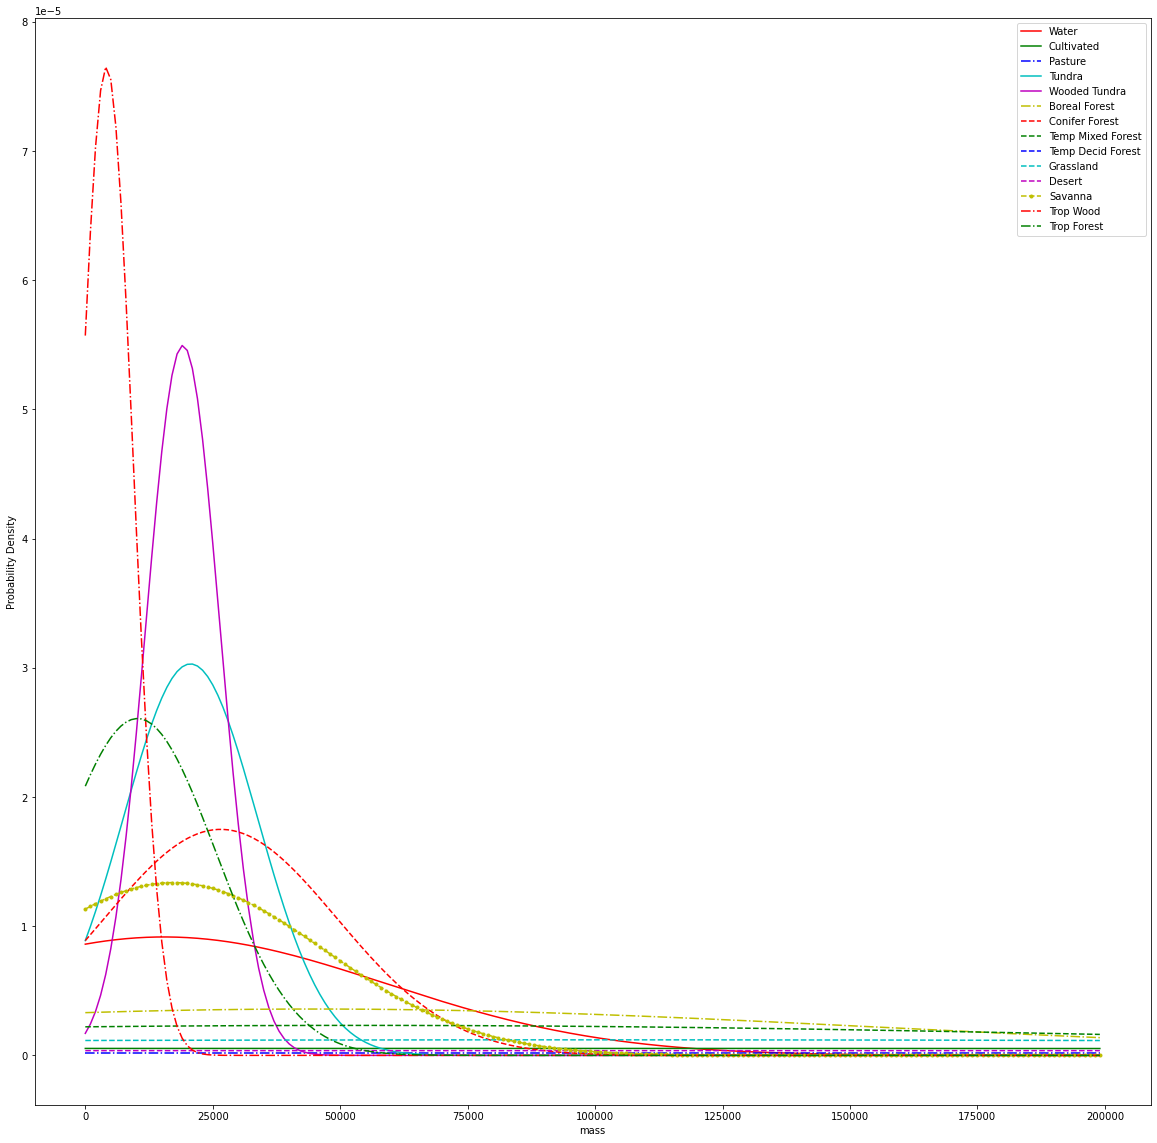

In [22]:
# zoom in on the lower left corner....

figure(figsize=(20,20))

x = np.arange(0,200000,1000)
y = stats.norm.pdf(x, mu_a, sigma_a)
plt.plot(x,y,'r-', label='Water')

y = stats.norm.pdf(x, mu_b, sigma_b)
plt.plot(x,y,'g-', label='Cultivated')

y = stats.norm.pdf(x, mu_c, sigma_c)
plt.plot(x,y,'b-.', label='Pasture')

y = stats.norm.pdf(x, mu_d, sigma_d)
plt.plot(x,y,'c-', label='Tundra')

y = stats.norm.pdf(x, mu_e, sigma_e)
plt.plot(x,y,'m-', label='Wooded Tundra')

y = stats.norm.pdf(x, mu_f, sigma_f)
plt.plot(x,y,'y-.', label='Boreal Forest')

y = stats.norm.pdf(x, mu_g, sigma_g)
plt.plot(x,y,'r--', label='Conifer Forest')

y = stats.norm.pdf(x, mu_h, sigma_h)
plt.plot(x,y,'g--', label='Temp Mixed Forest')

y = stats.norm.pdf(x, mu_i, sigma_i)
plt.plot(x,y,'b--', label='Temp Decid Forest')

y = stats.norm.pdf(x, mu_j, sigma_j)
plt.plot(x,y,'c--', label='Grassland')

y = stats.norm.pdf(x, mu_k, sigma_k)
plt.plot(x,y,'m--', label='Desert')

y = stats.norm.pdf(x, mu_l, sigma_l)
plt.plot(x,y,'y--.', label='Savanna')

y = stats.norm.pdf(x, mu_m, sigma_m)
plt.plot(x,y,'r-.', label='Trop Wood')

y = stats.norm.pdf(x, mu_n, sigma_n)
plt.plot(x,y,'g-.', label='Trop Forest')

plt.xlabel('mass')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')

plt.show()

In [23]:
# Reject the null hypothesis.  There are quite noticible differences in mass for different categories.

# Most massives: Savanna, Temp Mixed Forest, Grassland
# Least = Tropical Woodland